In [2]:
import sys

def custom_exc(shell, etype, value, tb, tb_offset=None):
    print("Problem: {}".format(value), file=sys.stderr)
    return None

get_ipython().set_custom_exc((AssertionError,), custom_exc)

In [1]:
import kechain2

In [3]:
kechain2.parts(category='INSTANCE')

In [4]:
kechain2.part('Bike')

In [5]:
kechain2.part('Bike').property('Gears').value

3

In [6]:
kechain2.properties('Diameter')[0].value = 30

In [15]:
wheel_model = kechain2.part(name='Wheel', category='MODEL')
wheels = kechain2.parts(model=wheel_model.id)

for wheel in wheels:
    wheel.property('Diameter').value = 5.2
    wheel.property('Spokes').value = 10

In [2]:
picture = kechain2.part('Bike').property('Picture')

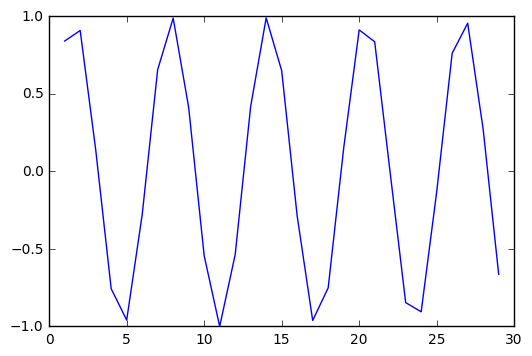

In [5]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(1, 30)
y = np.sin(x)

plt.plot(x, y)

picture.value = plt.gcf()

plt.show()

In [10]:
plt.gcf()